## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

A real estate investment firm is trying to expand their business to the pacific north west.  Considering that they are new to the area they are trying to understand how the housing market works in this new region.  The focus is on King Couty, Washington with the emphasis on understanding how the attributes of homes in this area affect the overall sale price.

# Data Understanding

The data provided to us encompasses over 18,500 home sold in the King County area.  The sales of these homes took place between May of 2014 and May of 2015.  Alongside the sale price, each home has 21 features which describe the interanal as well as external makeup.  Utilizing this data we can understand how the features and attributes which make up a home can coincide with the price the home was sold.

### Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [3]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

### Data Info

Looking at null values, data types and column names

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

An overview of null values in the datasets columns.

In [6]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Clean Data

### Squarefeet Basement

Squarefeet basement was listed as an object.  To make clean this category we replaced the '?" will null values.  After changing the dat type from an object to a float we filled the null values with the mean of the overall column.  Rather than determining if there is a basement or not, we kept the square footage to see if price goes up with square footage.

In [7]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
276.0         1
176.0         1
143.0         1
602.0         1
1770.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [9]:
data.sqft_basement = data.sqft_basement.astype("float")

In [10]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

### Waterfront

Waterfront had null values.  The assumption is that null values represent that there is no waterfront.
Renamed yes to waterfront as 1 and no to waterfront as 0.

In [11]:
data['waterfront'].value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [12]:
data['waterfront'].fillna('NO', inplace=True)

In [13]:
data['waterfront'] = data.waterfront.map({'NO': 0, 'YES': 1})

In [14]:
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Renovated

Change the structure of the data to represent 1 as renovated and 0 as not renovated.  Null values were changed to not renovated under assumption.

In [15]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
data['yr_renovated'].fillna(0.0, inplace=True)

In [17]:
data['yr_renovated']=data['yr_renovated'].apply(lambda x: 1 if x!=0 else x)

In [18]:
data['yr_renovated'].value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

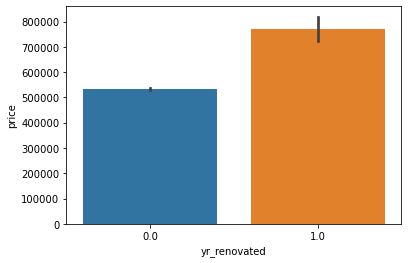

In [19]:
sns.barplot(x = 'yr_renovated', y = 'price', data=data)

### View

In [20]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

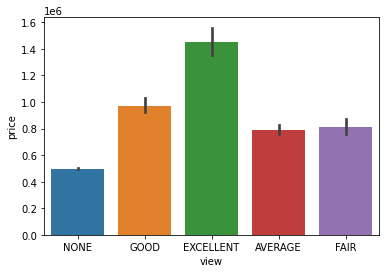

In [21]:
sns.barplot(x = 'view', y = 'price', data=data)

In [22]:
data['view'].fillna('NONE', inplace=True)

In [23]:
data['view']=data['view'].apply(lambda x: 0 if x== 'NONE' else 1)

In [24]:
data['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

### Year Built

In [25]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [26]:
data['yr_built']=data['yr_built'].apply(lambda x: 0 if x> 1980 else 1)

In [27]:
data['yr_built'].value_counts()

1    12568
0     9029
Name: yr_built, dtype: int64

### Date

In [28]:
data['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/27/2015      1
1/31/2015      1
8/30/2014      1
5/17/2014      1
2/15/2015      1
Name: date, Length: 372, dtype: int64

In [29]:
date_years = data['date'].apply(lambda x: int(x[-4:]))

In [30]:
date_years.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

### Grade

Create dummy variables for grade.

In [31]:
data['grade'].value_counts(normalize=True)

7 Average        0.415521
8 Good           0.280826
9 Better         0.121082
6 Low Average    0.094365
10 Very Good     0.052507
11 Excellent     0.018475
5 Fair           0.011205
12 Luxury        0.004121
4 Low            0.001250
13 Mansion       0.000602
3 Poor           0.000046
Name: grade, dtype: float64

In [32]:
grade_dummies = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

In [33]:
data = data.drop(['grade'], axis=1)

In [34]:
data = pd.concat([data, grade_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_11 Excellent,grd_12 Luxury,grd_13 Mansion,grd_3 Poor,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,0,0,0,0,1,0


### Condition

Create dummy variables for condition.

In [35]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

In [36]:
condition_dummies = pd.get_dummies(data['condition'], prefix='cnd', drop_first=True)

In [37]:
data = data.drop(['condition'], axis=1)

In [38]:
data = pd.concat([data, condition_dummies], axis=1)
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,...,0,0,0,0,1,0,0,0,0,0


### Drop columns which are not needed

Drop columns which will not be used in the model.  These columns include id, date, zipcode, lat, and long

In [39]:
data.drop(columns=['id', 'index', 'date', 'zipcode', 'lat', 'long'],
        inplace=True)

# Visualizing Distributions

### Histograms

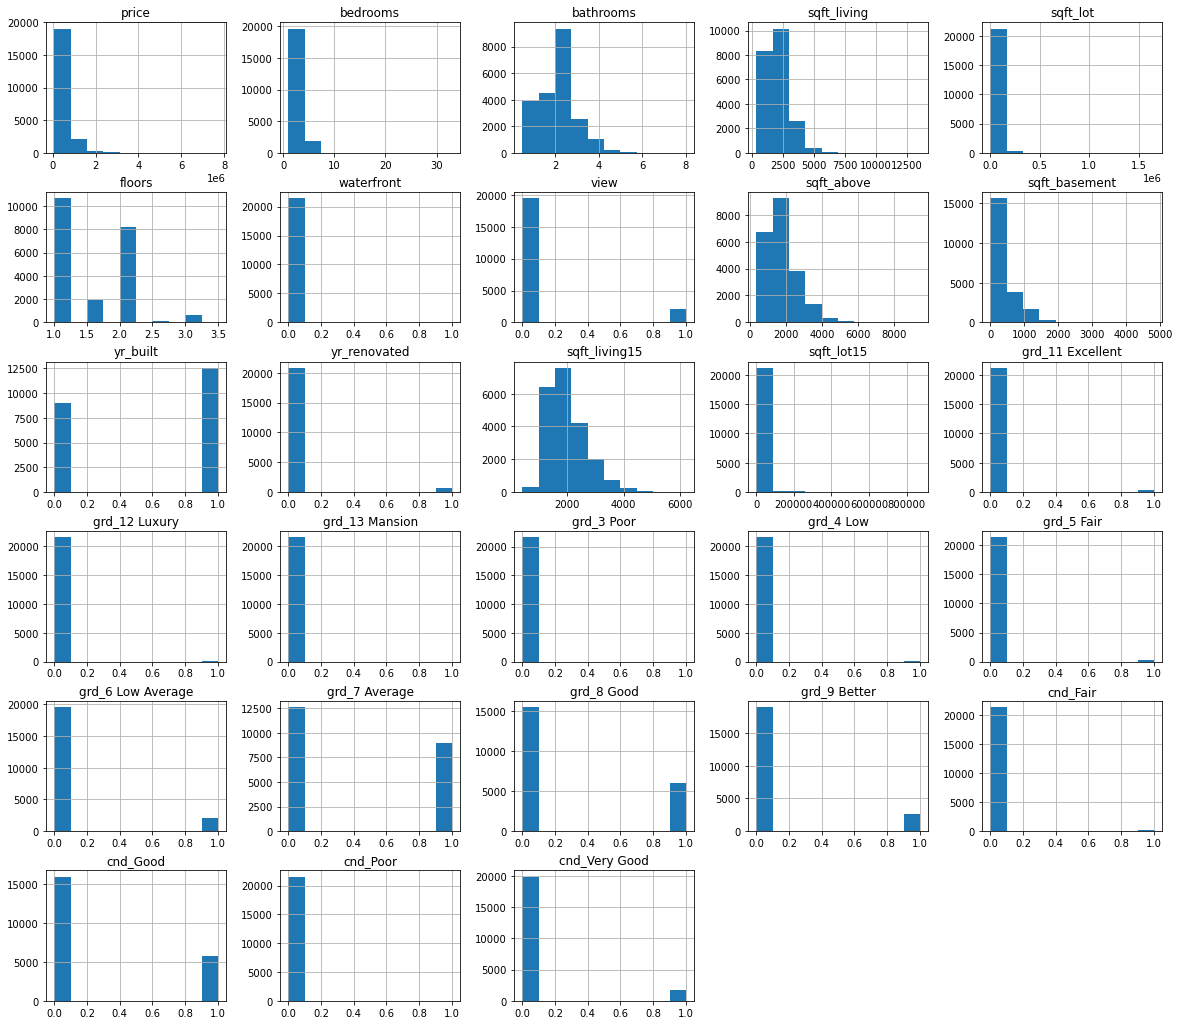

In [40]:
data.hist(figsize = (20, 18));

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

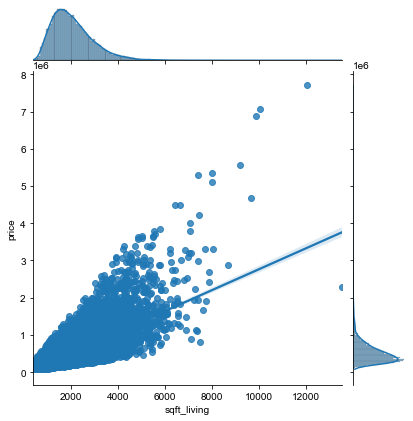

In [41]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

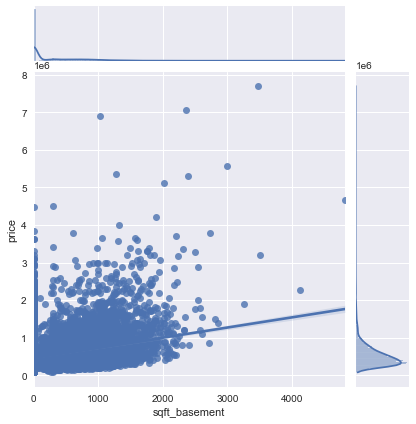

In [42]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

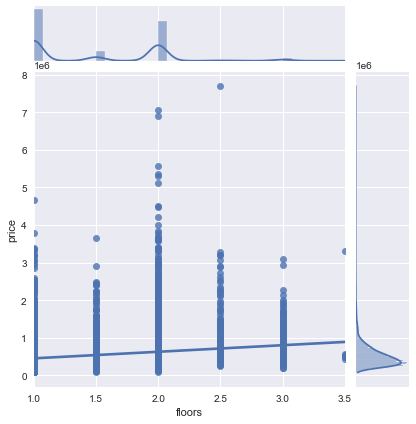

In [43]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

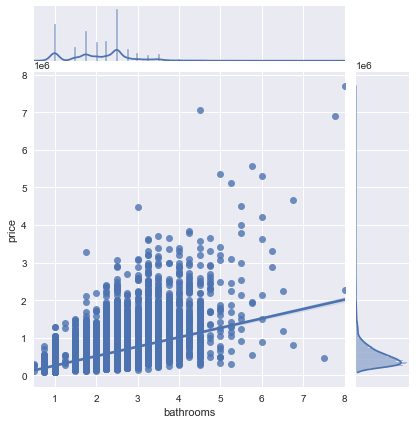

In [44]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

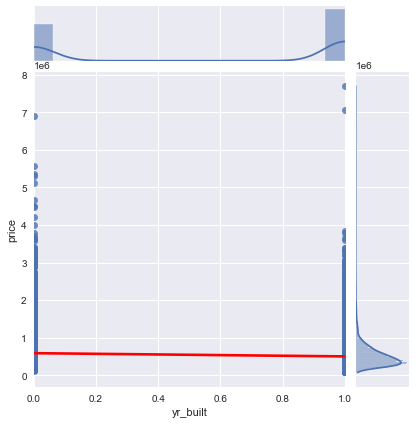

In [45]:
g = sns.jointplot('yr_built', 'price', data=data, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.style.use('seaborn')
sns.set_style("darkgrid")

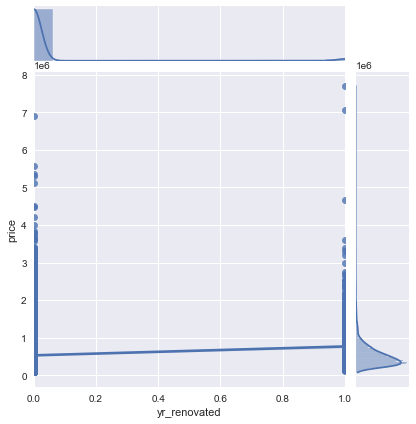

In [46]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

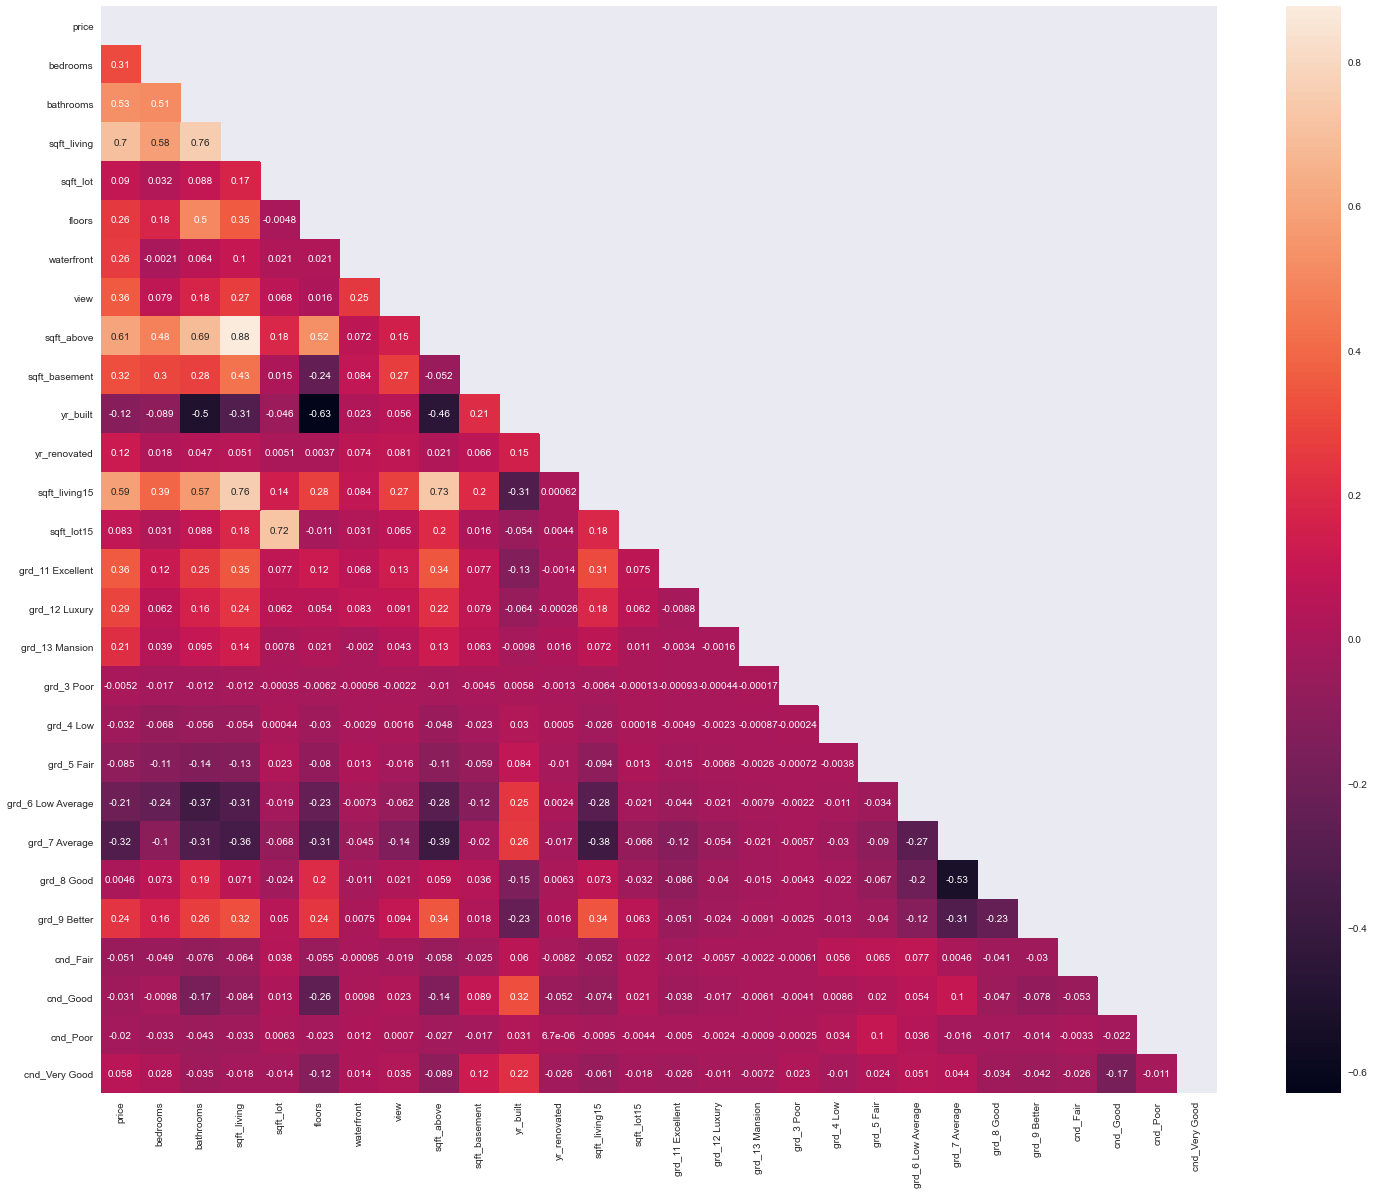

In [47]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

In [51]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'grd_11 Excellent',
       'grd_12 Luxury', 'grd_13 Mansion', 'grd_3 Poor', 'grd_4 Low',
       'grd_5 Fair', 'grd_6 Low Average', 'grd_7 Average', 'grd_8 Good',
       'grd_9 Better', 'cnd_Fair', 'cnd_Good', 'cnd_Poor', 'cnd_Very Good'],
      dtype='object')

# Modeling

## 1. Create Baseline Model

Create baseline model with no complex features.  Only containing highly correlated independent variables.

In [48]:
y = data['price']

x = data[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_basement']]

In [49]:
model_data = x

In [50]:
import statsmodels.api as sm

model_data_int=sm.add_constant(model_data)
baseline_model=sm.OLS(y,model_data_int).fit()
results=baseline_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5572.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:16:54   Log-Likelihood:            -2.9973e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.144e+04   6991.165     11.650      0.000    6.77e+04    9.51e+04
sqft_living     303.5383      3.257     93.208      0.000     297.155     309.921
bathrooms      9724.0323   3533.557      2.752      0.006    2798.000    1.67e+04
bedrooms      -5.983e+04   2352.945    -25.428      0.000   -6.44e+04   -5.52e+04
sqft_basement    29.6010      4.465      6.630      0.000      20.850      38.352
==============================================================================
Omnibus:                    14360.449   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           487291.345
Skew:                           2.719   Prob(JB):                         0.00
Kurtosis:                      25.626   Cond. No.                     9.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check Assumptions

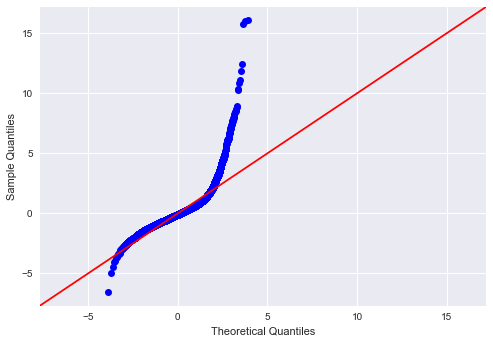

In [69]:
import scipy.stats as stats

fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

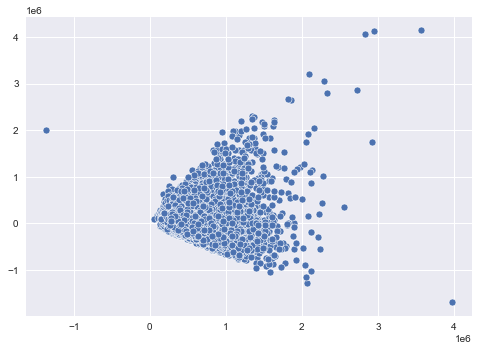

In [80]:
preds = baseline_model.predict(model_data_int)
plot = sns.scatterplot(preds, baseline_model.resid)
plot = sns.lineplot([11, 17], [0, 0], color = 'red')

## 2. Add in Categorical Variables

In [52]:
x_2 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'grd_11 Excellent',
       'grd_12 Luxury', 'grd_13 Mansion', 'grd_3 Poor', 'grd_4 Low',
       'grd_5 Fair', 'grd_6 Low Average', 'grd_7 Average', 'grd_8 Good',
       'grd_9 Better', 'cnd_Fair', 'cnd_Good', 'cnd_Poor', 'cnd_Very Good']]

In [53]:
model_data_2 = x_2

In [54]:
model_data_int_2=sm.add_constant(model_data_2)
second_model=sm.OLS(y,model_data_int_2).fit()
results=second_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1712.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:23:55   Log-Likelihood:            -2.9558e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21571   BIC:                         5.914e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.709e+05    1.5e+04     24.735      0.000    3.42e+05       4e+05
bedrooms          -2.749e+04   2066.192    -13.304      0.000   -3.15e+04   -2.34e+04
bathrooms          3.047e+04   3449.493      8.834      0.000    2.37e+04    3.72e+04
sqft_living         117.6435      3.994     29.453      0.000     109.815     125.473
sqft_lot             -0.2728      0.036     -7.563      0.000      -0.344      -0.202
floors             6.828e+04   3982.581     17.144      0.000    6.05e+04    7.61e+04
waterfront         6.407e+05   1.84e+04     34.869      0.000    6.05e+05    6.77e+05
view               1.004e+05   5431.601     18.482      0.000    8.97e+04    1.11e+05
sqft_basement        43.0480      4.554      9.454      0.000      34.123      51.973
yr_built            1.43e+05   4567.733     31.298      0.000    1.34e+05    1.52e+05
yr_renovated       9.667e+04   8280.119     11.675      0.000    8.04e+04    1.13e+05
sqft_living15        27.4749      3.574      7.688      0.000      20.470      34.480
grd_11 Excellent   2.792e+05   1.27e+04     22.065      0.000    2.54e+05    3.04e+05
grd_12 Luxury      7.726e+05   2.41e+04     32.026      0.000    7.25e+05     8.2e+05
grd_13 Mansion     2.004e+06   6.05e+04     33.148      0.000    1.89e+06    2.12e+06
grd_3 Poor        -4.974e+05   2.13e+05     -2.334      0.020   -9.15e+05   -7.97e+04
grd_4 Low         -4.951e+05   4.23e+04    -11.705      0.000   -5.78e+05   -4.12e+05
grd_5 Fair        -4.903e+05    1.7e+04    -28.884      0.000   -5.24e+05   -4.57e+05
grd_6 Low Average -4.551e+05   1.07e+04    -42.443      0.000   -4.76e+05   -4.34e+05
grd_7 Average     -4.064e+05   8920.626    -45.558      0.000   -4.24e+05   -3.89e+05
grd_8 Good        -3.364e+05   8049.777    -41.786      0.000   -3.52e+05   -3.21e+05
grd_9 Better      -1.919e+05   7822.417    -24.526      0.000   -2.07e+05   -1.77e+05
cnd_Fair          -1.603e+04   1.66e+04     -0.965      0.335   -4.86e+04    1.65e+04
cnd_Good           2.479e+04   3671.237      6.752      0.000    1.76e+04     3.2e+04
cnd_Poor            668.8152   3.99e+04      0.017      0.987   -7.75e+04    7.88e+04
cnd_Very Good      8.747e+04   5813.742     15.045      0.000    7.61e+04    9.89e+04
==============================================================================
Omnibus:                    12027.875   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385881.163
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      23.276   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

### Check Assumptions

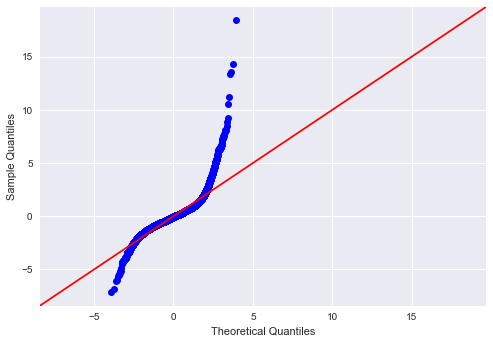

In [72]:
fig = sm.graphics.qqplot(second_model.resid, dist=stats.norm, line='45', fit=True)

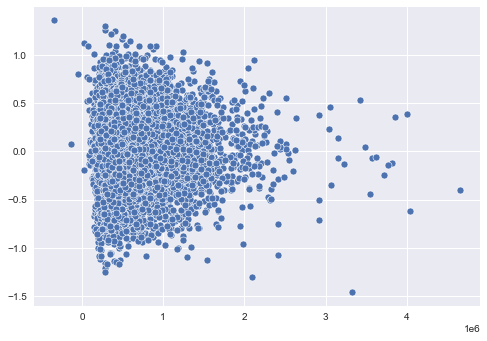

In [81]:
preds = second_model.predict(model_data_int_2)
plot = sns.scatterplot(preds, third_model.resid)
plot = sns.lineplot([11, 17], [0, 0], color = 'red')

## 3. Remodeling with price log transformation

Run a log function to change the structure of price to make it normally distirbuted.

In [57]:
p = np.log(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

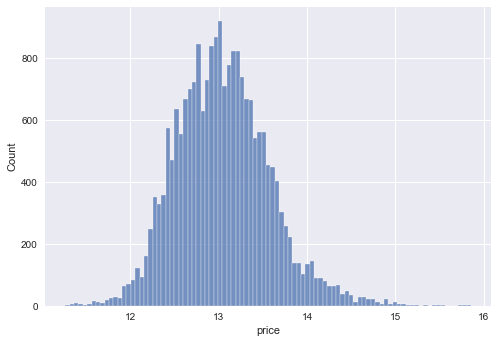

In [58]:
sns.histplot(p)

In [59]:
y_log = p

In [60]:
third_model=sm.OLS(y_log,model_data_int_2).fit()
results=third_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1440.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:28:18   Log-Likelihood:                -6193.4
No. Observations:               21597   AIC:                         1.244e+04
Df Residuals:                   21571   BIC:                         1.265e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.6711      0.023    557.474      0.000      12.627      12.716
bedrooms             -0.0315      0.003    -10.050      0.000      -0.038      -0.025
bathrooms             0.0347      0.005      6.643      0.000       0.024       0.045
sqft_living           0.0001   6.05e-06     21.041      0.000       0.000       0.000
sqft_lot          -4.812e-08   5.47e-08     -0.880      0.379   -1.55e-07    5.91e-08
floors                0.1378      0.006     22.832      0.000       0.126       0.150
waterfront            0.4059      0.028     14.574      0.000       0.351       0.460
view                  0.1307      0.008     15.878      0.000       0.115       0.147
sqft_basement       9.09e-05    6.9e-06     13.170      0.000    7.74e-05       0.000
yr_built              0.2172      0.007     31.365      0.000       0.204       0.231
yr_renovated          0.1272      0.013     10.137      0.000       0.103       0.152
sqft_living15      9.955e-05   5.42e-06     18.377      0.000    8.89e-05       0.000
grd_11 Excellent      0.1330      0.019      6.934      0.000       0.095       0.171
grd_12 Luxury         0.2570      0.037      7.028      0.000       0.185       0.329
grd_13 Mansion        0.3929      0.092      4.287      0.000       0.213       0.573
grd_3 Poor           -0.8954      0.323     -2.772      0.006      -1.529      -0.262
grd_4 Low            -1.0963      0.064    -17.099      0.000      -1.222      -0.971
grd_5 Fair           -0.9762      0.026    -37.943      0.000      -1.027      -0.926
grd_6 Low Average    -0.7863      0.016    -48.376      0.000      -0.818      -0.754
grd_7 Average        -0.5765      0.014    -42.634      0.000      -0.603      -0.550
grd_8 Good           -0.3883      0.012    -31.822      0.000      -0.412      -0.364
grd_9 Better         -0.1692      0.012    -14.267      0.000      -0.192      -0.146
cnd_Fair             -0.1413      0.025     -5.608      0.000      -0.191      -0.092
cnd_Good              0.0385      0.006      6.918      0.000       0.028       0.049
cnd_Poor             -0.0891      0.060     -1.473      0.141      -0.208       0.029
cnd_Very Good         0.1518      0.009     17.230      0.000       0.135       0.169
==============================================================================
Omnibus:                       13.651   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.694
Skew:                          -0.056   Prob(JB):                      0.00106
Kurtosis:                       3.050   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

### Check Assumptions

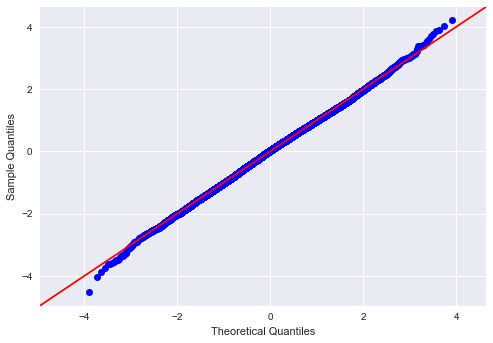

In [73]:
fig = sm.graphics.qqplot(third_model.resid, dist=stats.norm, line='45', fit=True)

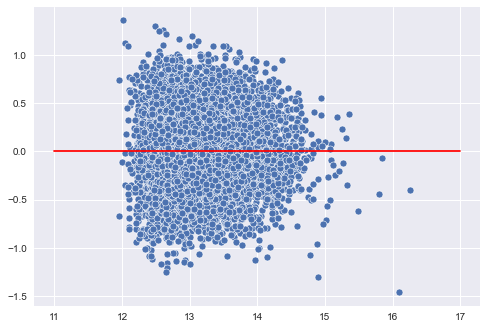

In [75]:
preds = third_model.predict(model_data_int_2)
plot = sns.scatterplot(preds, third_model.resid)
plot = sns.lineplot([11, 17], [0, 0], color = 'red')

## 4. Remodeling after dropping features

Remodeling after dropping features that have a high p value.  These features include sqft_lot, cnd_Poor, & grd_3 Poor.

In [62]:
x_3 = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'grd_11 Excellent',
       'grd_12 Luxury', 'grd_13 Mansion', 'grd_4 Low',
       'grd_5 Fair', 'grd_6 Low Average', 'grd_7 Average', 'grd_8 Good',
       'grd_9 Better', 'cnd_Fair', 'cnd_Good', 'cnd_Very Good']]

In [63]:
model_data_3 = x_3

In [64]:
model_data_int_3=sm.add_constant(model_data_3)
fourth_model=sm.OLS(y_log,model_data_int_3).fit()
results=fourth_model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1635.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:31:42   Log-Likelihood:                -6198.7
No. Observations:               21597   AIC:                         1.244e+04
Df Residuals:                   21574   BIC:                         1.263e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.6682      0.023    558.100      0.000      12.624      12.713
bedrooms             -0.0312      0.003     -9.987      0.000      -0.037      -0.025
bathrooms             0.0349      0.005      6.680      0.000       0.025       0.045
sqft_living           0.0001   5.98e-06     21.223      0.000       0.000       0.000
floors                0.1384      0.006     23.023      0.000       0.127       0.150
waterfront            0.4057      0.028     14.565      0.000       0.351       0.460
view                  0.1306      0.008     15.866      0.000       0.114       0.147
sqft_basement      9.145e-05   6.87e-06     13.318      0.000     7.8e-05       0.000
yr_built              0.2171      0.007     31.376      0.000       0.204       0.231
yr_renovated          0.1273      0.013     10.138      0.000       0.103       0.152
sqft_living15      9.949e-05   5.42e-06     18.371      0.000    8.89e-05       0.000
grd_11 Excellent      0.1335      0.019      6.960      0.000       0.096       0.171
grd_12 Luxury         0.2571      0.037      7.029      0.000       0.185       0.329
grd_13 Mansion        0.3946      0.092      4.306      0.000       0.215       0.574
grd_4 Low            -1.0981      0.064    -17.137      0.000      -1.224      -0.972
grd_5 Fair           -0.9786      0.026    -38.233      0.000      -1.029      -0.928
grd_6 Low Average    -0.7853      0.016    -48.385      0.000      -0.817      -0.753
grd_7 Average        -0.5752      0.014    -42.587      0.000      -0.602      -0.549
grd_8 Good           -0.3872      0.012    -31.757      0.000      -0.411      -0.363
grd_9 Better         -0.1682      0.012    -14.193      0.000      -0.191      -0.145
cnd_Fair             -0.1415      0.025     -5.623      0.000      -0.191      -0.092
cnd_Good              0.0387      0.006      6.959      0.000       0.028       0.050
cnd_Very Good         0.1516      0.009     17.210      0.000       0.134       0.169
==============================================================================
Omnibus:                       14.685   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.738
Skew:                          -0.059   Prob(JB):                     0.000631
Kurtosis:                       3.052   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check Assumptions

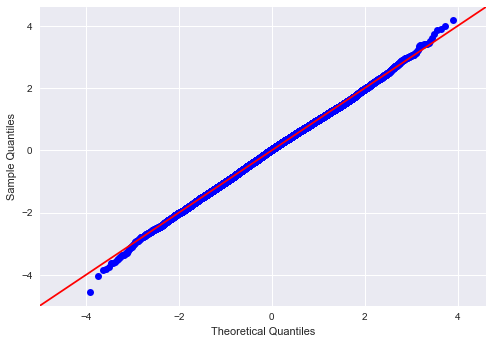

In [76]:
fig = sm.graphics.qqplot(fourth_model.resid, dist=stats.norm, line='45', fit=True)

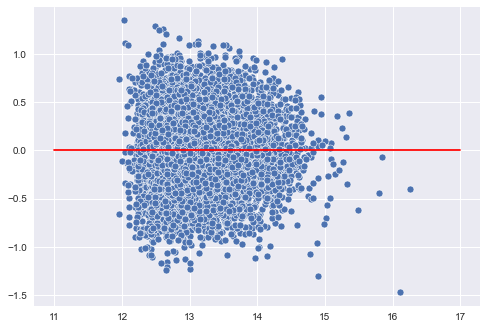

In [77]:
preds = fourth_model.predict(model_data_int_3)
plot = sns.scatterplot(preds, fourth_model.resid)
plot = sns.lineplot([11, 17], [0, 0], color = 'red')

## 5. Checking Multicolinearity

In [65]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.356243,0.605368,0.322192,...,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.079232,0.479386,0.299037,...,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.175884,0.686668,0.279541,...,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.268465,0.876448,0.430190,...,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.068216,0.184139,0.015293,...,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,0.037871,0.013284,0.006265,-0.014452
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.016311,0.523989,-0.242359,...,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184,-0.055337,-0.257672,-0.023029,-0.120546
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.248683,0.071778,0.083779,...,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487,-0.000954,0.009785,0.012406,0.013637
view,0.356243,0.079232,0.175884,0.268465,0.068216,0.016311,0.248683,1.000000,0.151909,0.270177,...,0.001587,-0.015795,-0.062015,-0.143475,0.021123,0.093790,-0.018741,0.023316,0.000698,0.034524
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.151909,1.000000,-0.051781,...,-0.047669,-0.108543,-0.280761,-0.387255,0.059423,0.343388,-0.057698,-0.142520,-0.027236,-0.088596
sqft_basement,0.322192,0.299037,0.279541,0.430190,0.015293,-0.242359,0.083779,0.270177,-0.051781,1.000000,...,-0.022986,-0.059496,-0.121654,-0.020111,0.035989,0.018274,-0.025129,0.089413,-0.017392,0.124712


In [66]:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grd_4 Low,grd_5 Fair,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [67]:
data = data.corr().abs().stack().reset_index().sort_values(0, ascending = False)

data['pairs'] = list(zip(data.level_0, data.level_1))

data.set_index(['pairs'], inplace = True)

data.drop(columns=['level_1', 'level_0'], inplace = True)

data.columns = ['cc']

data.drop_duplicates(inplace=True)

data[(data.cc>.75) & (data.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


The multicolinnearity does not signify anything which is worth changing in the model considering sqft_above, sqft_living 15 have already beeen removed.  Based on this information, it is not deemed necessary to remodel with this information in mind.

# Conclusion